In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Analyses
from src.analyses.schedule_jobs_dataframe import jobs_metrics_from_operations_df, mean_start_deviation_per_shift_df

df_experiments = pd.read_csv("experiments_v01.csv")
df_experiments

,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev,Experiment_Type,max_utilization
0,B-1,0.25,1.00,0.75,0.1,1440,1,0,3,CP,0.75
1,B-2,0.25,0.75,0.75,0.1,1440,3,1,12,CP,0.75
2,B-3,0.25,0.50,0.75,0.1,1440,1,1,6,CP,0.75
3,B-4,0.25,0.25,0.75,0.1,1440,1,3,12,CP,0.75
4,B-5,0.25,0.00,0.75,0.1,1440,0,1,3,CP,0.75
...,...,...,...,...,...,...,...,...,...,...,...
175,R-125,1.00,1.00,0.95,0.3,1440,1,0,0,CP,0.95
176,R-126,1.00,0.75,0.95,0.3,1440,3,1,0,CP,0.95
177,R-127,1.00,0.50,0.95,0.3,1440,1,1,0,CP,0.95
178,R-128,1.00,0.25,0.95,0.3,1440,1,3,0,CP,0.95


In [10]:
df_schedules = pd.read_csv("schedules_v01.csv")
df_metrics = jobs_metrics_from_operations_df(df_schedules)
df_metrics["Abs_Lateness"] = df_metrics["Lateness"].abs()
df_metrics


,Job,Routing_ID,Experiment_ID,Shift,Arrival,Due Date,Completion,Tardiness,Earliness,Lateness,Abs_Lateness
0,01-07500-0000,01-07,B-1,1,0,3405,3068,0,337,-337,337
1,01-07500-0001,01-06,B-1,1,60,2433,2374,0,59,-59,59
2,01-07500-0002,01-01,B-1,1,142,2766,2427,0,339,-339,339
3,01-07500-0003,01-05,B-1,1,197,2640,2262,0,378,-378,378
4,01-07500-0004,01-04,B-1,1,249,3581,3078,0,503,-503,503
...,...,...,...,...,...,...,...,...,...,...,...
74455,01-08500-0409,01-07,R-99,22,31539,33765,33942,177,0,177,177
74456,01-08500-0410,01-09,R-99,22,31589,33041,33622,581,0,581,581
74457,01-08500-0411,01-03,R-99,22,31599,33608,33608,0,0,0,0
74458,01-08500-0412,01-06,R-99,22,31620,33025,33712,687,0,687,687


In [3]:
df_metrics[df_metrics.Earliness == 0]

,Job,Routing_ID,Experiment_ID,Shift,Arrival,Due Date,Completion,Tardiness,Earliness,Lateness
15,01-07500-0015,01-01,B-1,2,1628,4196,4196,0,0,0
17,01-07500-0017,01-05,B-1,2,2142,3930,3936,6,0,6
44,01-07500-0044,01-00,B-1,3,3782,5876,5876,0,0,0
52,01-07500-0052,01-01,B-1,3,4315,6559,6559,0,0,0
56,01-07500-0056,01-09,B-1,4,4638,7708,7708,0,0,0
...,...,...,...,...,...,...,...,...,...,...
74455,01-08500-0409,01-07,R-99,22,31539,33765,33942,177,0,177
74456,01-08500-0410,01-09,R-99,22,31589,33041,33622,581,0,581
74457,01-08500-0411,01-03,R-99,22,31599,33608,33608,0,0,0
74458,01-08500-0412,01-06,R-99,22,31620,33025,33712,687,0,687


## Evaluation

In [4]:
from src.DataFrameEvaluations import plot_experiment_heatmaps_good_low,plot_experiment_boxrow, plot_experiment_lines_compare

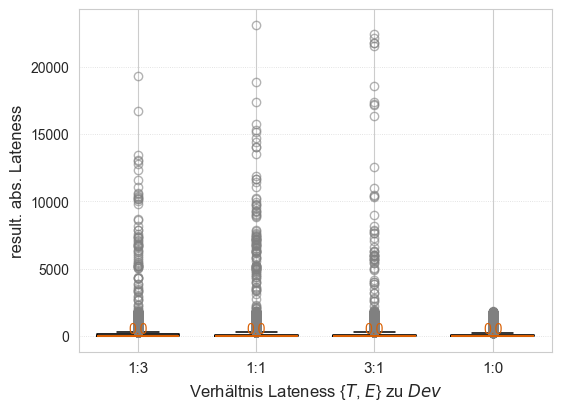

In [26]:
fig, axes = plot_experiment_boxrow(
    df_values=df_metrics,
    df_meta=df_experiments,
    value_col="Abs_Lateness",
    x_col="Abs Lateness Ratio", x_col_as= r"Verhältnis Lateness {${T}$, ${E}$} zu ${Dev}$",
    # optional Facetten, falls gewünscht:
    #col_col="Sim Sigma",
    value_as="result. abs. Lateness",
    median_fmt = ".1f"
)
plt.show()

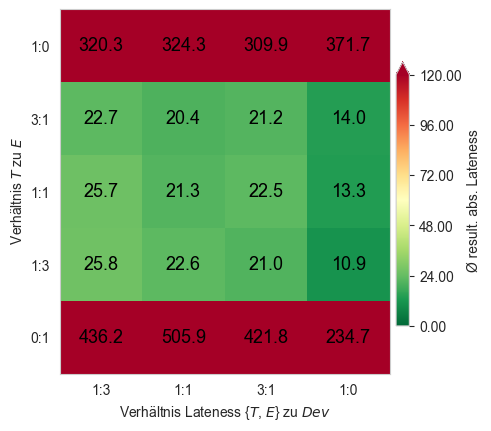

In [20]:
fig, axes = plot_experiment_heatmaps_good_low(
    df_values=df_metrics,
    df_meta=df_experiments,
    value_col="Abs_Lateness", value_as="Ø result. abs. Lateness",
    x_col="Abs Lateness Ratio", x_col_as= r"Verhältnis Lateness {${T}$, ${E}$} zu ${Dev}$",
    y_col="Inner Tardiness Ratio", y_col_as=  r" Verhältnis ${T}$ zu ${E}$",
    vmin=0.0, vmax= 120,
    #vmax=df_experiments["Mean_Tardiness"].max(),
    annot=True, fmt=".1f",
    extend="auto",
    xlabel_at_col = 1,
)

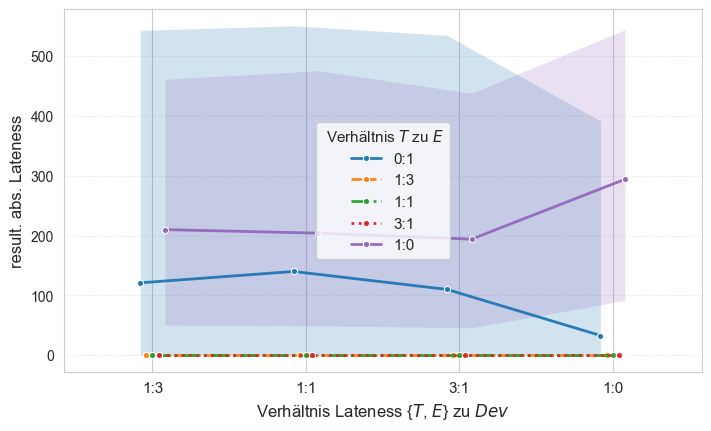

In [21]:
fig, ax = plot_experiment_lines_compare(
    df_values=df_metrics,
    df_meta=df_experiments,
    value_col="Abs_Lateness", value_as="result. abs. Lateness",
    x_col="Abs Lateness Ratio", x_col_as= r"Verhältnis Lateness {${T}$, ${E}$} zu ${Dev}$",
    compare_col="Inner Tardiness Ratio", compare_col_as= r" Verhältnis ${T}$ zu ${E}$",
    agg_method="median",
    show_quantile_band=True,
    quantile_band=(0.25, 0.75),
    compare_col_is_ratio = True,
    dodge = 0.04
)
plt.show()

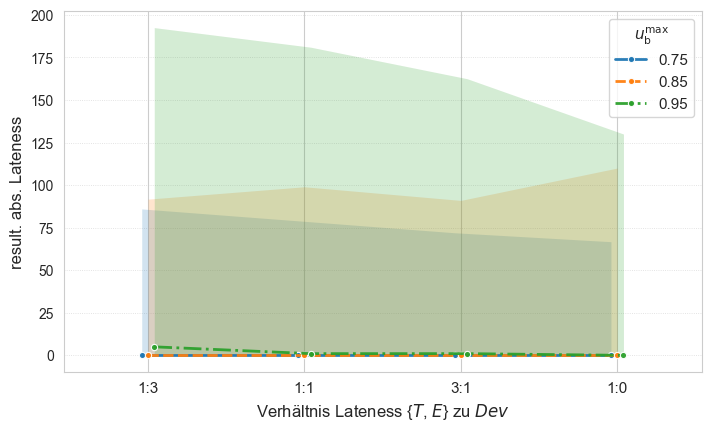

In [23]:
fig, ax = plot_experiment_lines_compare(
    df_values=df_metrics,
    df_meta=df_experiments,
    value_col="Abs_Lateness", value_as="result. abs. Lateness",
    x_col="Abs Lateness Ratio", x_col_as= r"Verhältnis Lateness {${T}$, ${E}$} zu ${Dev}$",
    compare_col="Max Bottleneck Utilization",
    compare_col_as=r"$u_{\mathrm{b}}^{\max}$",
    agg_method="median",
    show_quantile_band=True,
    quantile_band=(0.25, 0.75)
)
plt.show()

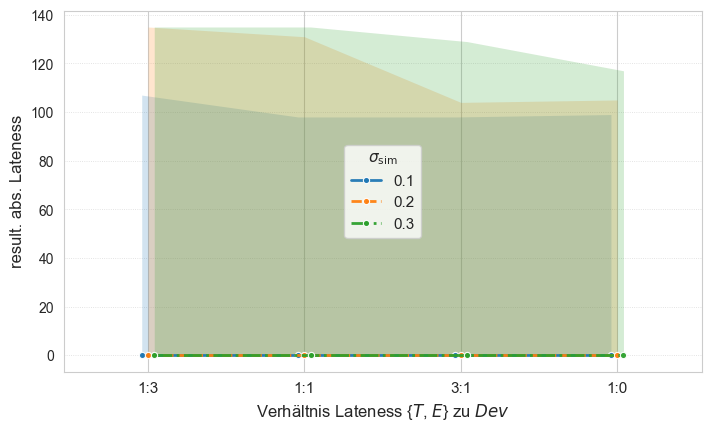

In [24]:
fig, ax = plot_experiment_lines_compare(
    df_values=df_metrics,
    df_meta=df_experiments,
    value_col="Abs_Lateness", value_as="result. abs. Lateness",
    x_col="Abs Lateness Ratio", x_col_as= r"Verhältnis Lateness {${T}$, ${E}$} zu ${Dev}$",
    compare_col="Sim Sigma",
    compare_col_as=r"$\sigma_{\mathrm{sim}}$",
    agg_method="median",
    show_quantile_band=True,
    quantile_band=(0.25, 0.75)
)
plt.show()